In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('Mastercard.csv')

In [3]:
data.shape 

(4446, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-06-26,4.695,4.750,4.643,4.750,4.359506,8565000
1,2006-06-27,4.750,4.803,4.725,4.731,4.342068,9826000
2,2006-06-28,4.685,4.740,4.650,4.696,4.309944,8756000
3,2006-06-29,4.695,4.809,4.695,4.800,4.405394,14470000
4,2006-06-30,4.765,4.800,4.660,4.800,4.405394,25964000


In [5]:
data.index 

RangeIndex(start=0, stop=4446, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

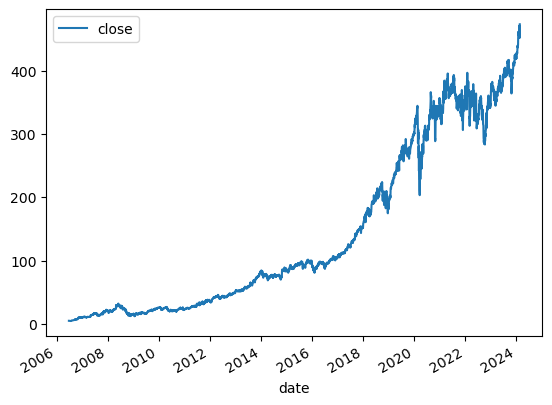

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('Mastercard.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,4446.000000,4446.000000,4446.000000,4446.000000,4.446000e+03
mean,142.272421,143.743986,140.786164,142.312886,1.093449e+07
std,133.190790,134.549673,131.834661,133.236249,1.557665e+07
min,4.391000,4.410000,4.367000,4.390000,6.411000e+05
25%,25.624251,25.875499,25.290250,25.559001,3.193700e+06
50%,88.059998,89.219998,87.509998,88.049999,4.998450e+06
75%,271.232499,274.450004,268.765007,271.077499,1.118950e+07
max,474.170013,475.170013,471.859985,473.420013,2.820630e+08


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data['previousday']=data['close'].shift(1)

In [13]:
data.head() 

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
2006-06-26,4.695,4.750,4.643,4.750,8565000,4.731,NaN
2006-06-27,4.750,4.803,4.725,4.731,9826000,4.696,4.750
2006-06-28,4.685,4.740,4.650,4.696,8756000,4.800,4.731
2006-06-29,4.695,4.809,4.695,4.800,14470000,4.800,4.696
2006-06-30,4.765,4.800,4.660,4.800,25964000,4.730,4.800


In [14]:
train = data.iloc[:-200]
test = data.iloc[-200:]

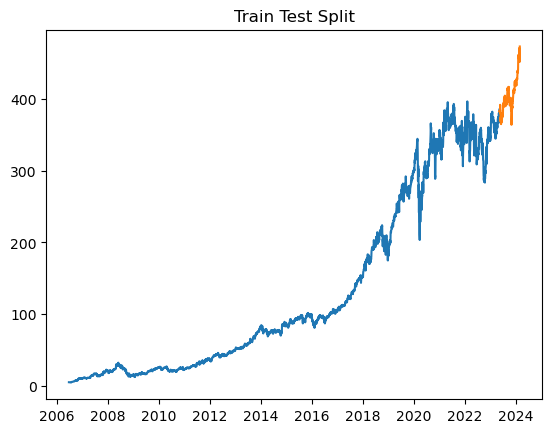

In [15]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [16]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [17]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [18]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 16.34
MAPE: 0.04
minae: 0.02
maxae: 79.94
medae: 6.14

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 16.45
MAPE: 0.04
minae: 0.02
maxae: 79.95
medae: 6.38

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 15.81
MAPE: 0.04
minae: 0.00
maxae: 79.10
medae: 5.53

Learning rate set to 0.334503
0:	learn: 83.5418350	total: 136ms	remaining: 13.4s
1:	learn: 56.6945518	total: 138ms	remaining: 6.76s
2:	learn: 38.5135878	total: 140ms	remaining: 4.53s
3:	learn: 26.4622385	total: 143ms	remaining: 3.42s
4:	learn: 18.4819164	total: 146ms	remaining: 2.78s
5:	learn: 13.3028621	total: 150ms	remaining: 2.34s
6:	learn: 9.8929949	total: 153ms	remaining: 2.03s
7:	learn: 7.8215577	total: 157ms	remaining: 1.8s
8:	learn: 6.6671419	total: 159ms	remaining: 1.61s
9:	learn: 5.8522013	total: 162ms	remaining: 1.46s
10:	learn: 5.3121716	total: 167ms

#### Retrain the best Model(Extreme Gradient Boosting)

In [19]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [20]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [21]:
#combined_1.plot();
combined_2

,close,0
date,,
2023-05-09,382.940002,386.069756
2023-05-10,382.540009,381.492148
2023-05-11,383.390015,382.124478
2023-05-12,381.920013,381.492148
2023-05-15,383.410004,382.313437
...,...,...
2024-02-16,468.130005,394.552008
2024-02-20,451.750000,394.555720
2024-02-21,459.049988,394.827703


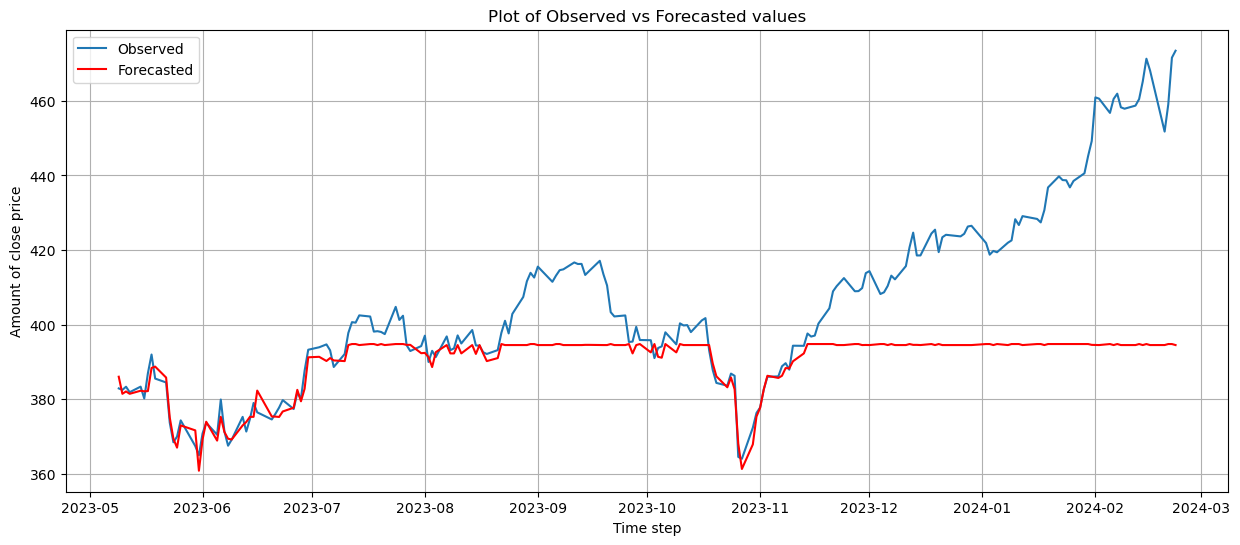

In [22]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [23]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [24]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [25]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [26]:
data['RSI']= computeRSI(data['close'], 14)

In [27]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
2006-06-26,4.695,4.750,4.643,4.750,8565000,4.731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-27,4.750,4.803,4.725,4.731,9826000,4.696,4.750,0.997996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-28,4.685,4.740,4.650,4.696,8756000,4.800,4.731,0.996287,9.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-29,4.695,4.809,4.695,4.800,14470000,4.800,4.696,1.010952,9.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,4.765,4.800,4.660,4.800,25964000,4.730,4.800,1.000000,9.496,1.009379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.shape 

(4446, 19)

In [29]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
2006-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.750,NaN
2006-06-27,0.997996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.731,NaN
2006-06-28,0.996287,9.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.696,NaN
2006-06-29,1.010952,9.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.800,NaN
2006-06-30,1.000000,9.496,1.009379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.800,NaN


In [30]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [31]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [32]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [33]:
new_data=new_data.dropna()
new_data.shape 

(3446, 16)

In [34]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2010-06-16,1.002499,41.374001,1.018117,101.920001,0.903713,1402.011003,0.942598,5581.435985,1.214252,17329.342977,21.062000,0.043862,20.812000,20.731001,17.333072,21.747833
2010-06-17,1.007960,42.019001,1.025651,103.436001,0.920294,1398.365003,0.956822,5586.158984,1.232554,17345.654977,21.400000,0.067918,21.139667,20.959000,17.337131,21.730865
2010-06-18,1.000607,42.462000,1.017746,104.324002,0.923426,1395.206003,0.957001,5591.423984,1.232863,17362.323977,21.426001,0.065864,21.296000,21.211251,17.341207,21.715994
2010-06-21,1.020750,42.826001,1.041902,105.262002,0.964135,1392.164004,0.996432,5597.171985,1.283815,17379.053978,22.334000,0.105644,21.720000,21.555500,17.346180,21.746141
2010-06-22,0.994598,43.760001,1.019886,107.179002,0.955513,1389.889005,0.984672,5603.492985,1.268758,17396.587978,22.094000,0.123405,21.951334,21.813500,17.350904,21.763109


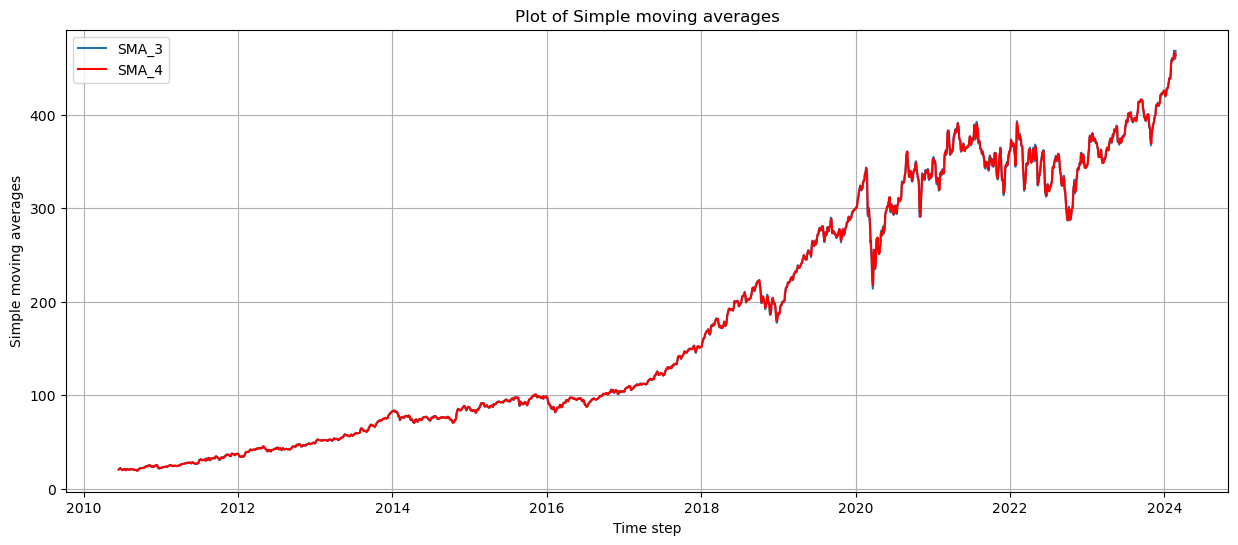

In [35]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

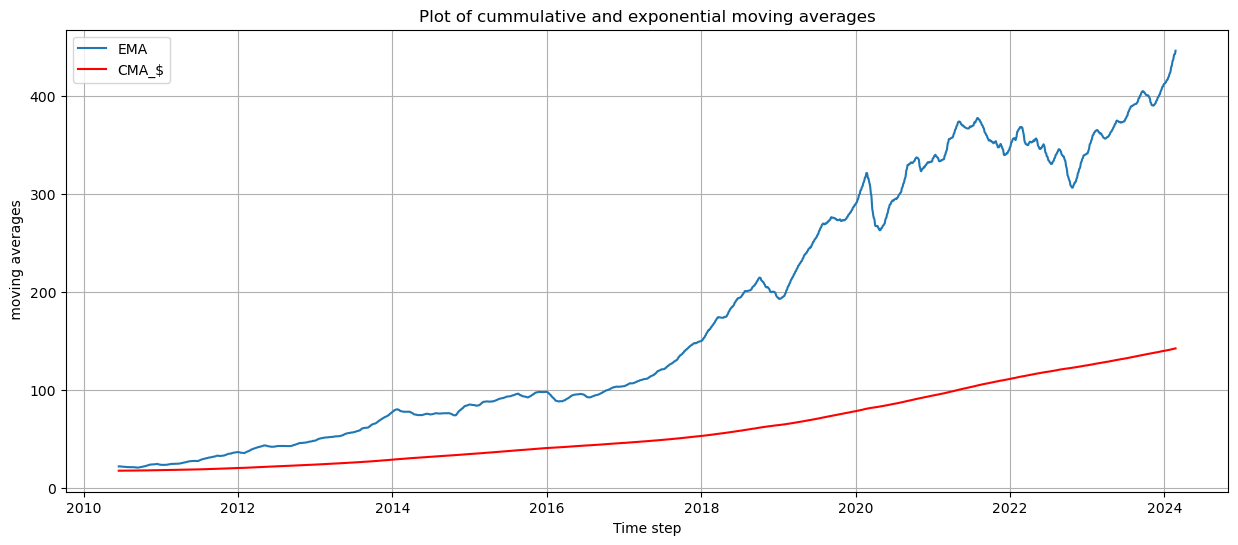

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

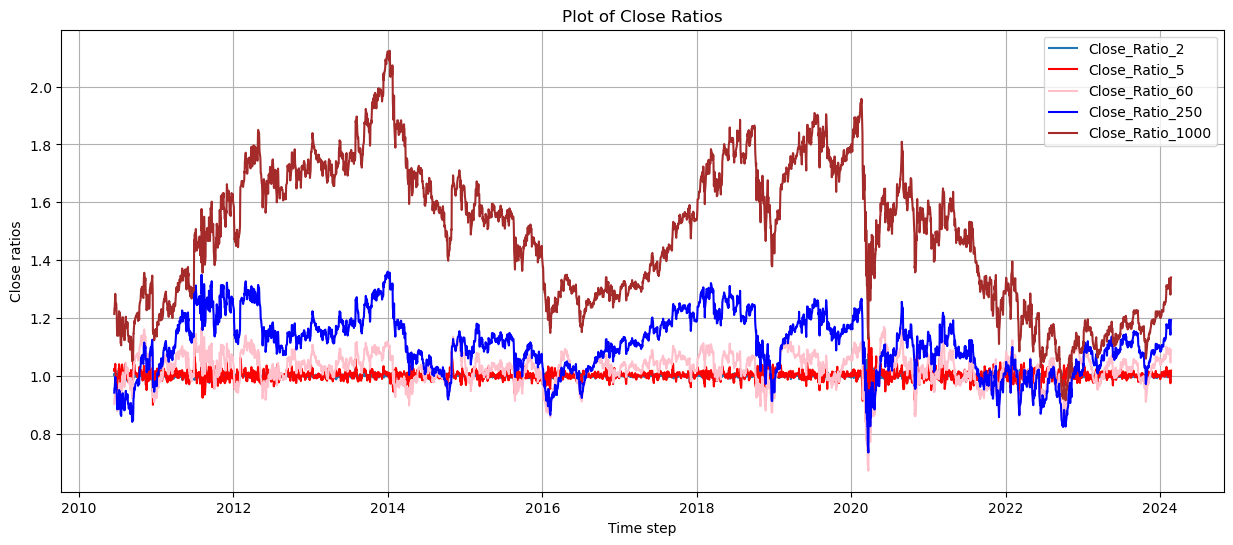

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

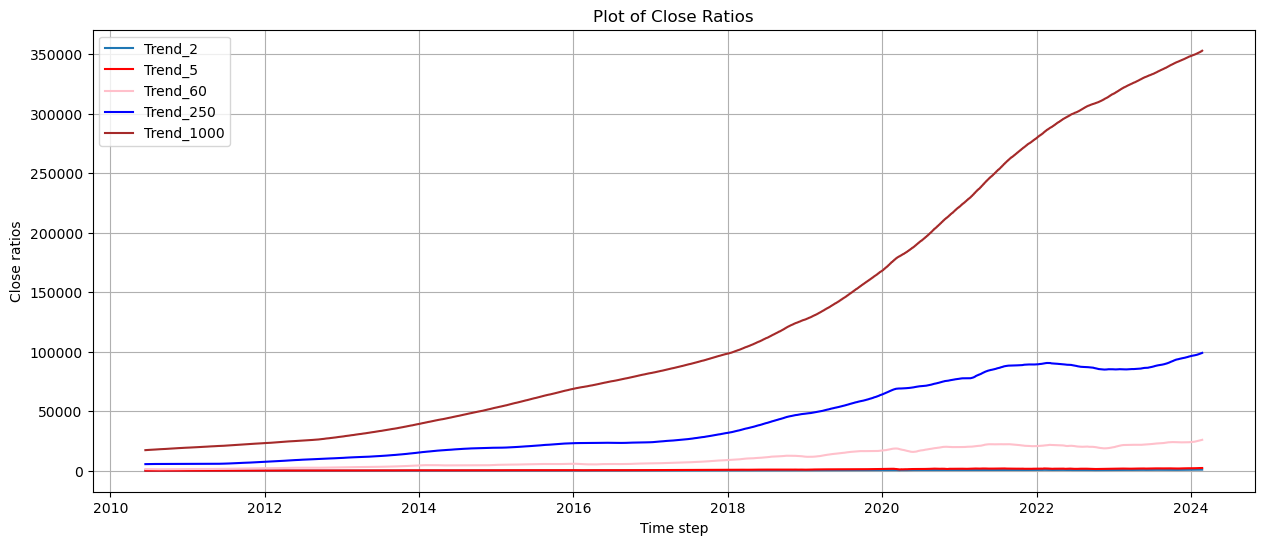

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [39]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

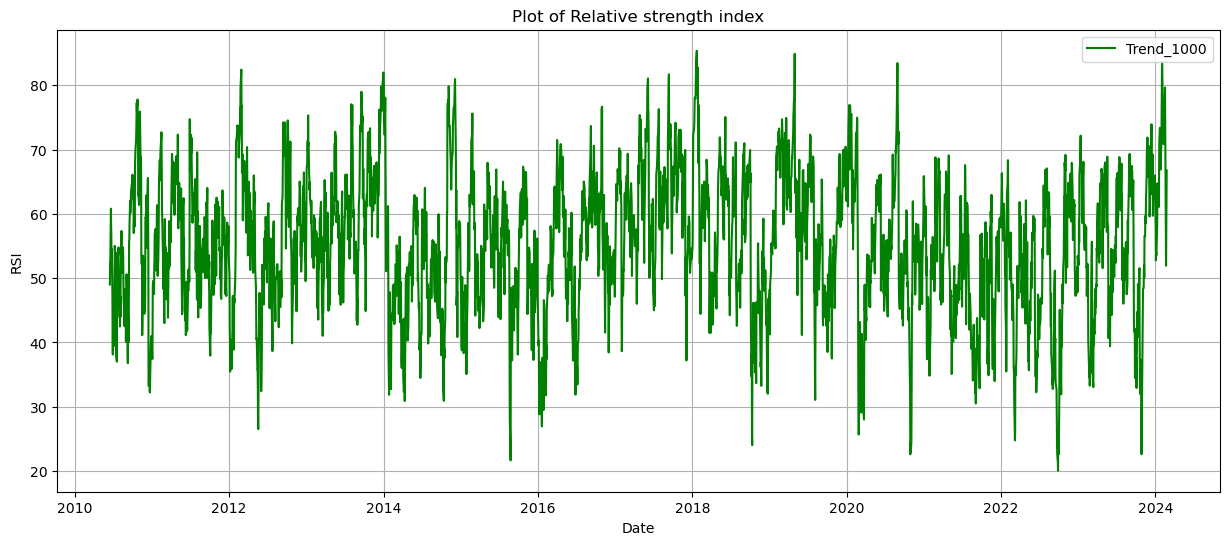

In [40]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

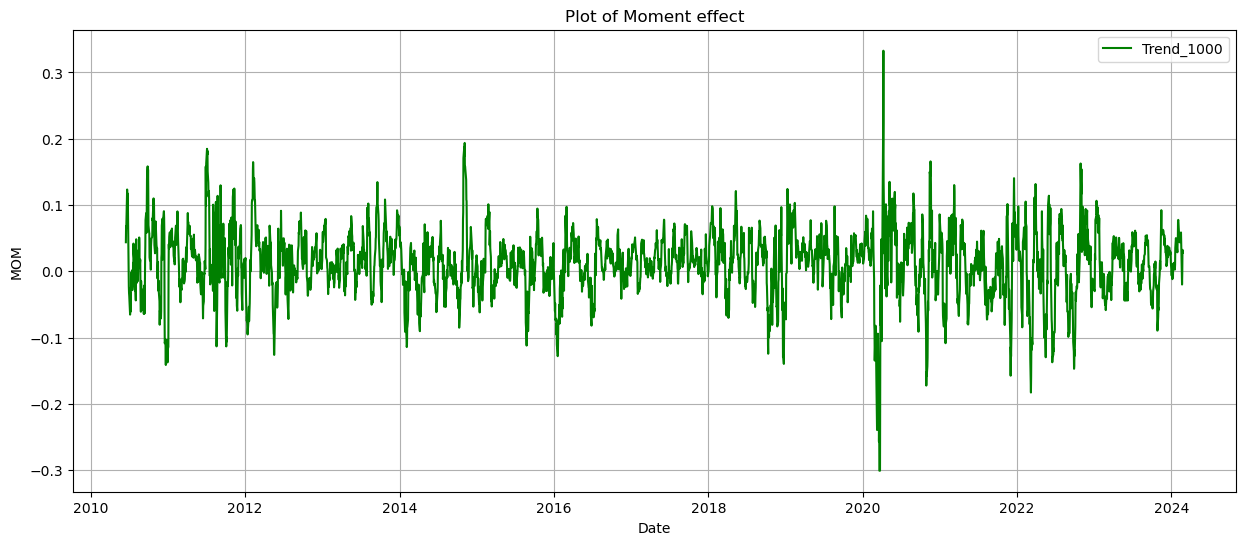

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [42]:
train = new_data.iloc[:-200]
test = new_data.iloc[-200:]

In [43]:
train.shape

(3246, 18)

In [44]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [45]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM', 'previousday'] 

#### Retrain the models on the new predictors

In [46]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 19.37
MAPE: 0.05
minae: 0.00
maxae: 82.49
medae: 11.51

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 21.55
MAPE: 0.05
minae: 0.03
maxae: 81.94
medae: 17.65

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 20.28
MAPE: 0.05
minae: 0.08
maxae: 82.06
medae: 14.62

Learning rate set to 0.320607
0:	learn: 84.2549138	total: 3ms	remaining: 297ms
1:	learn: 58.7598663	total: 5.51ms	remaining: 270ms
2:	learn: 40.7670069	total: 7.95ms	remaining: 257ms
3:	learn: 28.7588591	total: 10.5ms	remaining: 252ms
4:	learn: 20.4723770	total: 13.9ms	remaining: 264ms
5:	learn: 14.8422007	total: 16.6ms	remaining: 259ms
6:	learn: 11.3115320	total: 18.9ms	remaining: 251ms
7:	learn: 9.0569376	total: 21.3ms	remaining: 245ms
8:	learn: 7.6521245	total: 23.8ms	remaining: 241ms
9:	learn: 6.8618584	total: 26.6ms	remaining: 239ms
10:	learn: 6.2959661	total: 29.6ms	remaining: 240ms
11:	learn: 

#### Improving the model

In [47]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [48]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [49]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [50]:
predictions_2 = backtest(new_data, model_2, predictors)

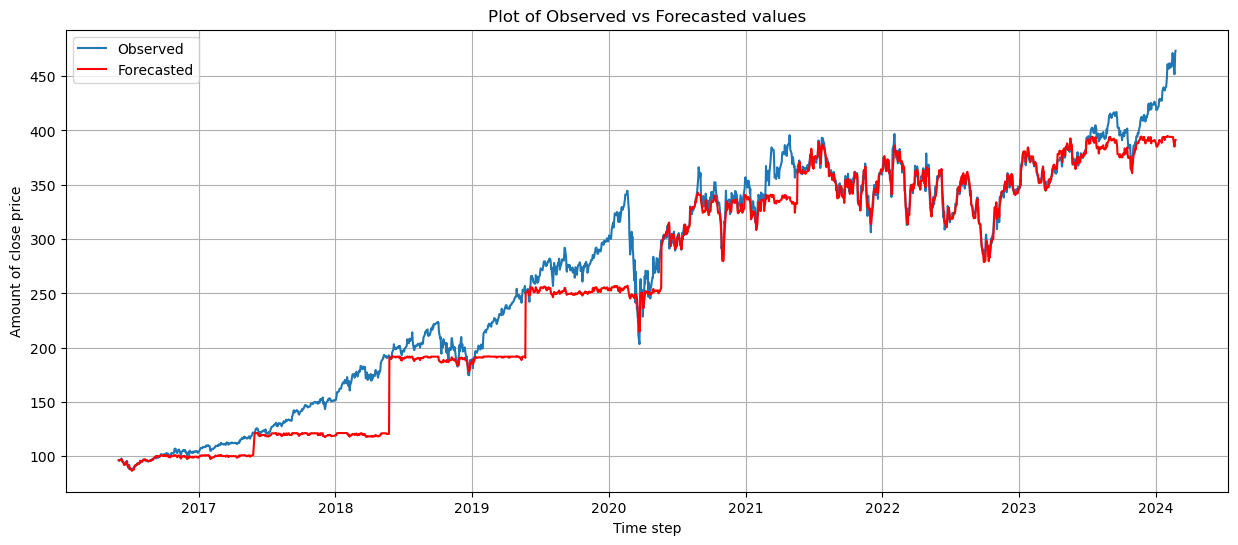

In [51]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [52]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [53]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [54]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.04964140889969409

mean absolute  error is : 21.04236275071491



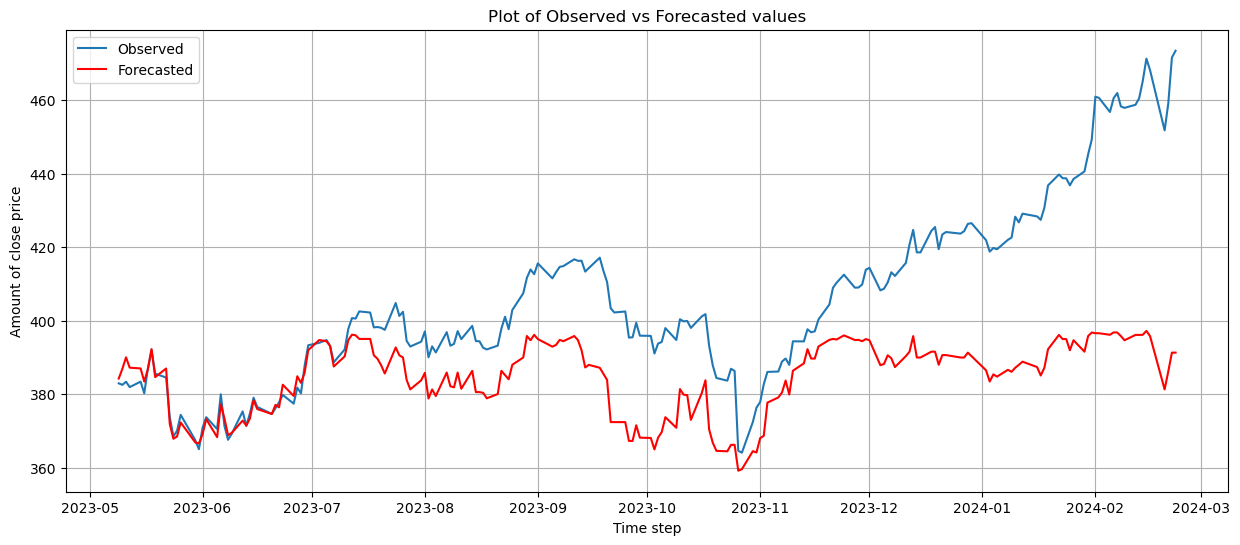

In [55]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [56]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [57]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [58]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 19.549362147689827 
 gradientboost minae: 0.0030400571080804184 
 gradientboost maxae: 81.18916959267091 
 gradientboost medae: 13.935467617452531 
 gradientboost Mape: 0.045936227446645786 
  

 <-------------------------------------------------->



In [59]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2023-05-09,382.940002,387.258548
2023-05-10,382.540009,386.806871
2023-05-11,383.390015,383.744045
2023-05-12,381.920013,383.137813
2023-05-15,383.410004,384.623095
...,...,...
2024-02-16,468.130005,395.756793
2024-02-20,451.750000,384.195145
2024-02-21,459.049988,389.006804


In [60]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [61]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.045936227446645786

mean absolute  error is : 19.549362147689827



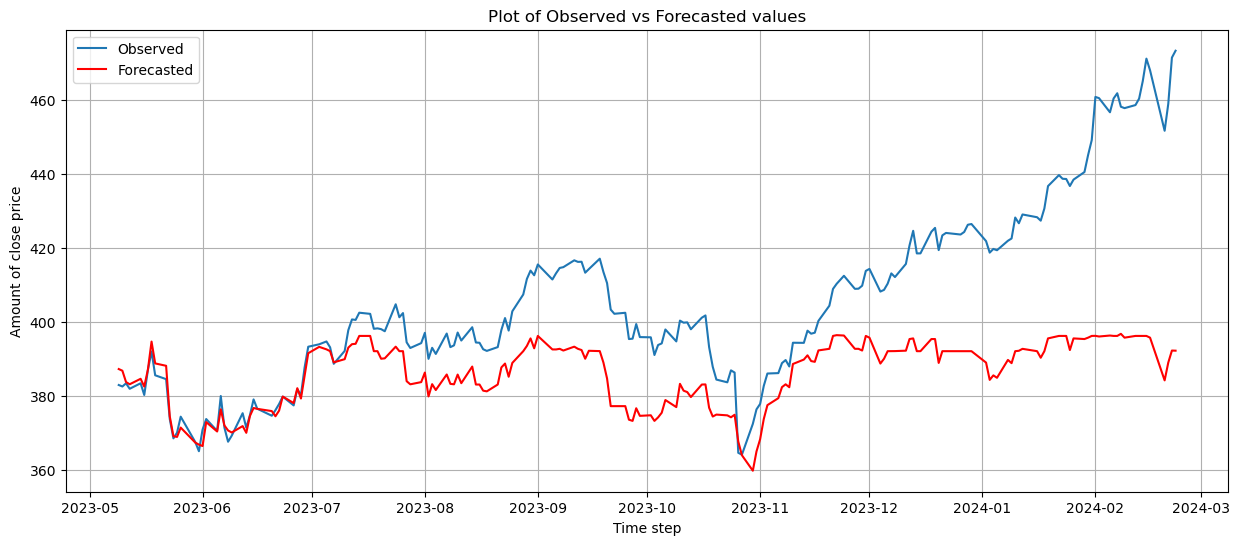

In [62]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [63]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 19.58829743150001 
 bagging minae: 0.17401130000001785 
 bagging maxae: 82.93301360000004 
 bagging medae: 12.210011049999963 
 bagging Mape: 0.04591859198342963 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 1.751567891063036 
 stacking minae: 0.013270493353161328 
 stacking maxae: 12.048996424223503 
 stacking medae: 1.2928277796752354 
 stacking mape: 0.004351075093920091 



In [64]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [65]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [66]:
combined_bagg

,close,0
date,,
2023-05-09,382.940002,387.296002
2023-05-10,382.540009,385.631998
2023-05-11,383.390015,384.233997
2023-05-12,381.920013,384.014993
2023-05-15,383.410004,382.325992
...,...,...
2024-02-16,468.130005,394.692996
2024-02-20,451.750000,382.874002
2024-02-21,459.049988,388.243997


In [67]:
combined_stack

,close,0
date,,
2023-05-09,382.940002,386.486632
2023-05-10,382.540009,384.068919
2023-05-11,383.390015,382.961220
2023-05-12,381.920013,382.495923
2023-05-15,383.410004,384.033511
...,...,...
2024-02-16,468.130005,468.808340
2024-02-20,451.750000,459.179595
2024-02-21,459.049988,459.650951


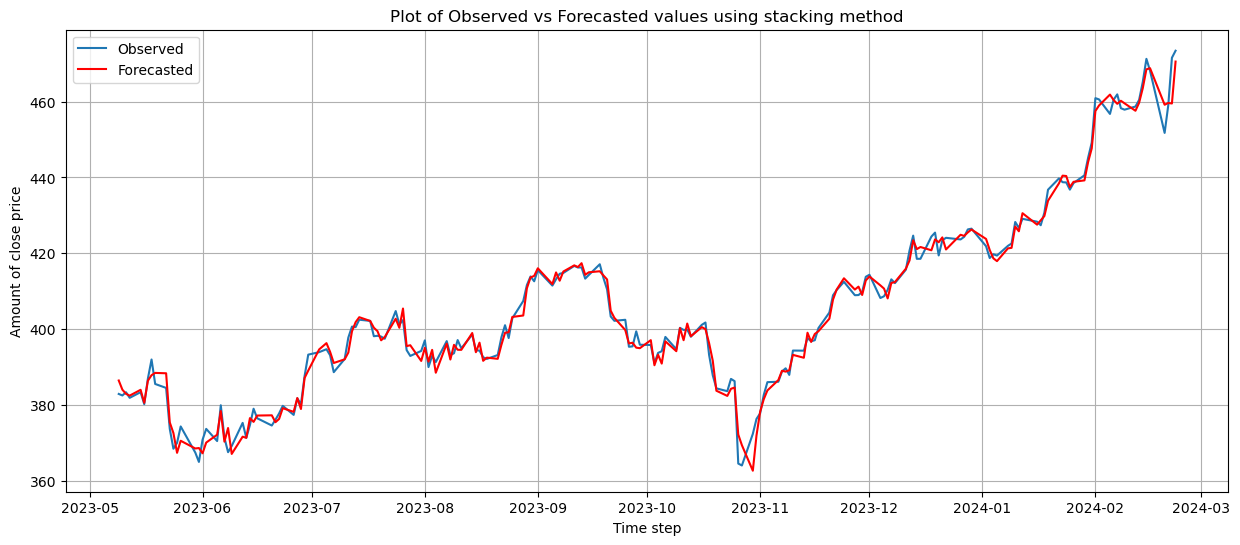

In [68]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

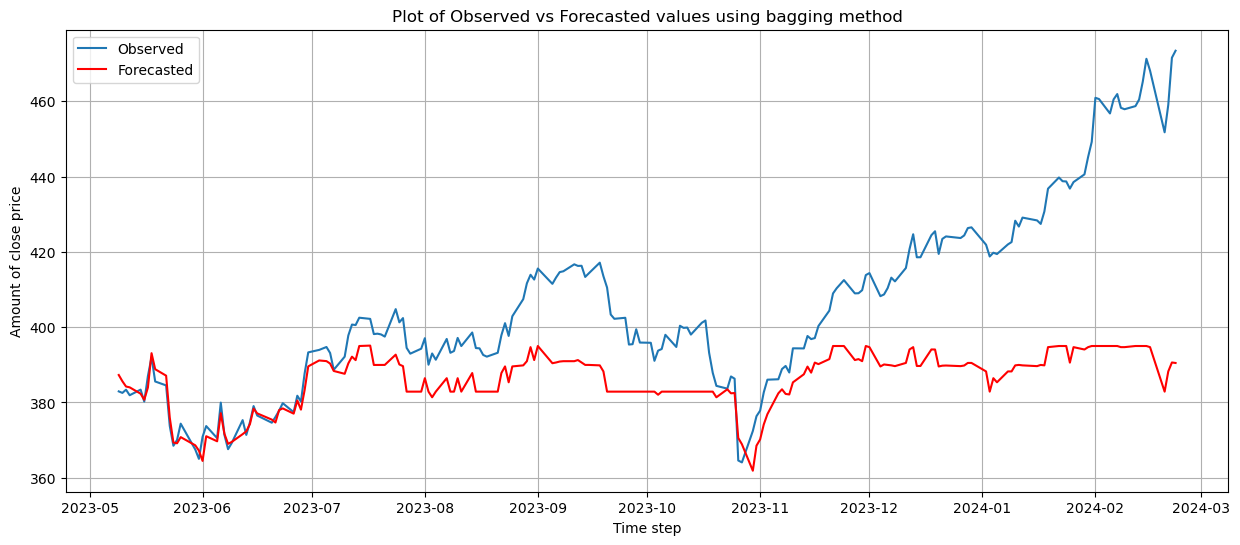

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

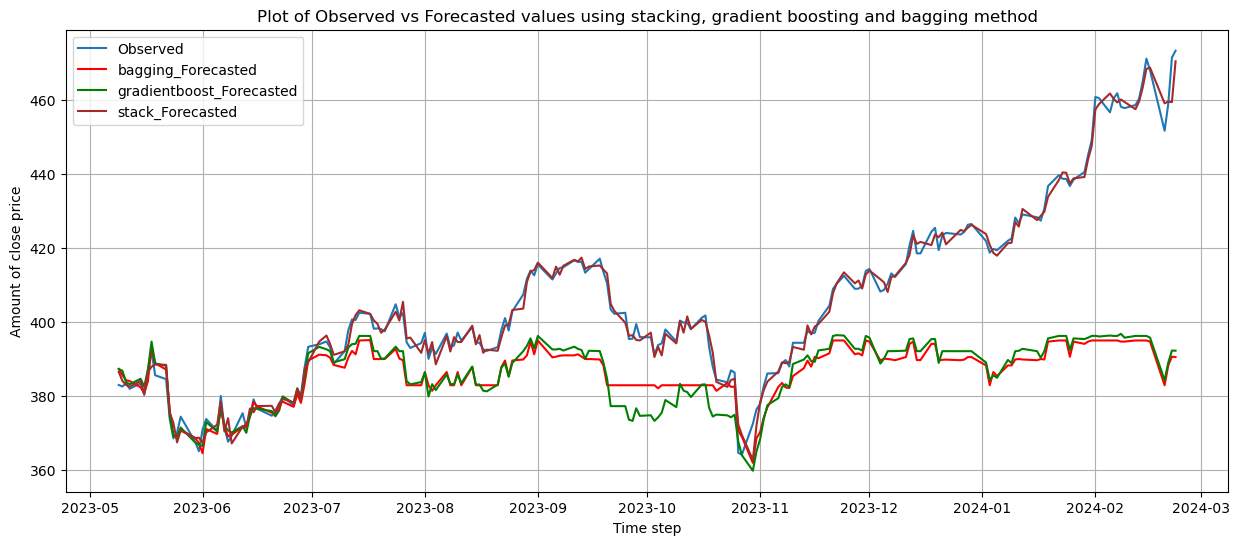

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('Mastercardresult.png')
plt.show()

In [71]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 19.37, 0.05, 0.00, 82.49, 11.51])
task1_result.add_row(['XGboost', 21.55, 0.05, 0.03, 81.94, 17.65])
task1_result.add_row(['GradientBoost', 20.28, 0.05, 0.08, 82.06, 14.62])
task1_result.add_row(['Catboost', 21.04, 0.05, 0.02, 82.12, 16.19])
task1_result.add_row(['Bagging', 19.59, 0.05, 0.17, 82.93, 12.21])
task1_result.add_row(['Stacking', 1.72, 0.00, 0.01, 12.40, 1.34])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |    19.37    |     0.05     |      0.0      |     82.49     |     11.51     |
|    XGboost    |    21.55    |     0.05     |      0.03     |     81.94     |     17.65     |
| GradientBoost |    20.28    |     0.05     |      0.08     |     82.06     |     14.62     |
|    Catboost   |    21.04    |     0.05     |      0.02     |     82.12     |     16.19     |
|    Bagging    |    19.59    |     0.05     |      0.17     |     82.93     |     12.21     |
|    Stacking   |     1.72    |     0.0      |      0.01     |      12.4     |      1.34     |
+---------------+-------------+--------------+---------------+---------------+---------------+
